# Selected Policies

This notebook is used to show the selected policies per problem formulation.

In [1]:
import pandas as pd
import os
from model.enumerations import ProblemFormulation
from dmdu.general.visualization import plot_single_parallel_axis_plot, get_limits_from_several_sources
from matplotlib import pyplot as plt
from dmdu.general.xlm_constants_epsilons import get_lever_names
from dmdu.policydiscovery.directed_policy_search import load_optimal_policy_dataframes

# Load results per problem formulation

In [2]:
lever_names = get_lever_names()

problem_formulations = [
    ProblemFormulation.UTILITARIAN_AGGREGATED,
    ProblemFormulation.UTILITARIAN_DISAGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_AGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_DISAGGREGATED
]

## Load selected optimal policies

In [3]:
problem_formulations_dict = {}
for problem_formulation in problem_formulations:
    target_directory = os.path.join(
        os.path.dirname(os.getcwd()),
        'paretosorting',
        'data',
        'final',
        f'sorted_{problem_formulation.name}.csv'
    )

    # Load policies
    policies_df = pd.read_csv(target_directory)
    policies_df = policies_df.loc[:, lever_names]
    problem_formulations_dict[problem_formulation.name] = policies_df

## Load all optimal policies

In [4]:
target_directory = os.path.join(
    os.path.dirname(os.getcwd()),
    'data'
)
problem_formulations_dict_all_policies = load_optimal_policy_dataframes(
    target_directory,
    problem_formulations,
    searchover='levers',
    nfe=200000,
    n_references=4,
    n_seeds=2,
)

[]

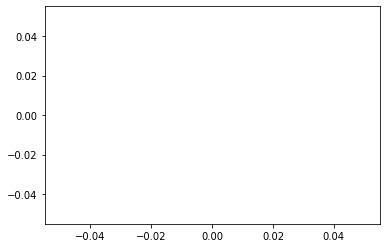

In [5]:
plt.plot()

UTILITARIAN_AGGREGATED


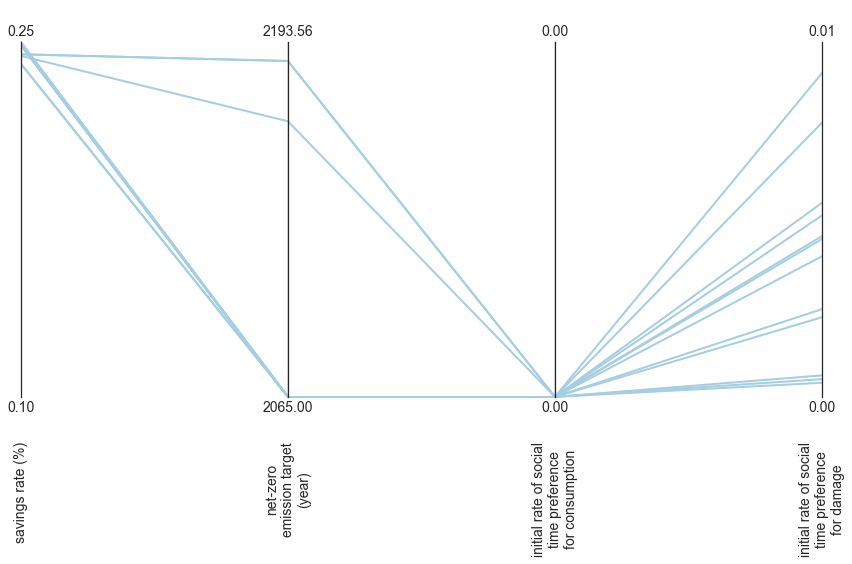

UTILITARIAN_DISAGGREGATED


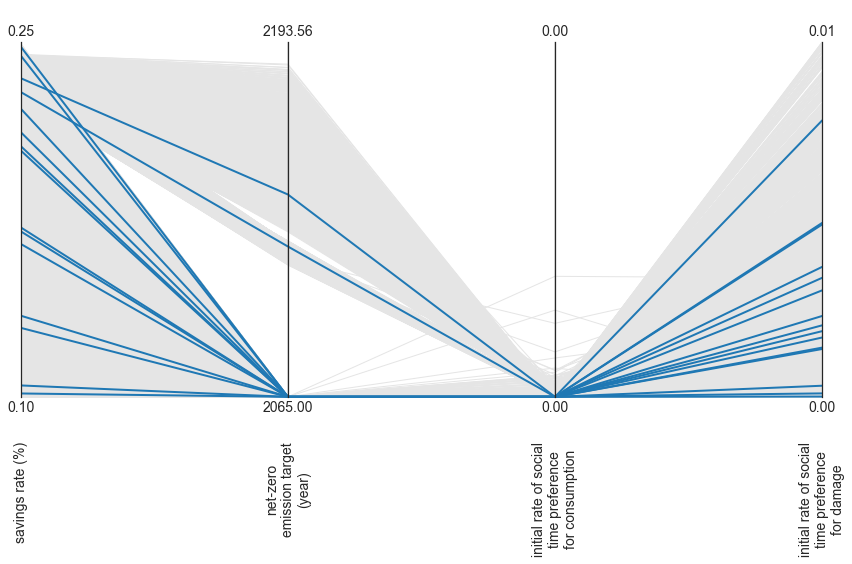

SUFFICIENTARIAN_AGGREGATED


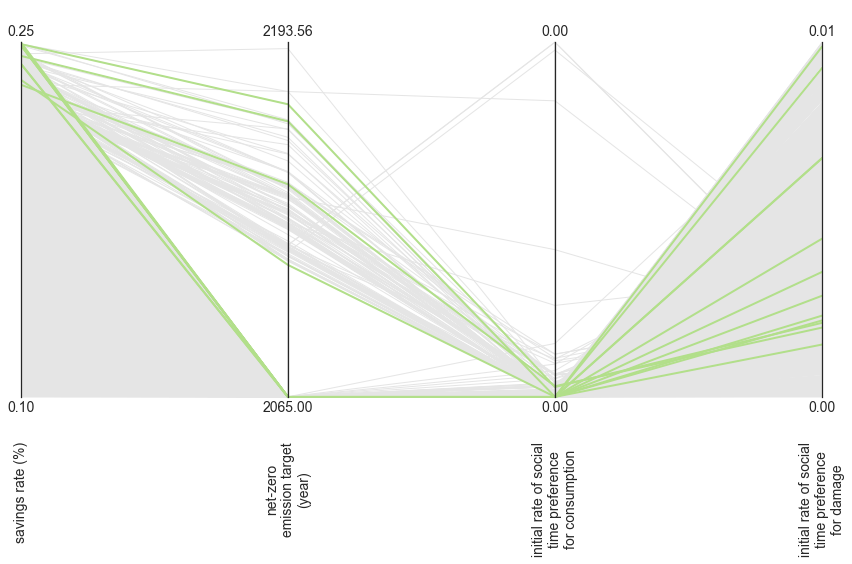

SUFFICIENTARIAN_DISAGGREGATED


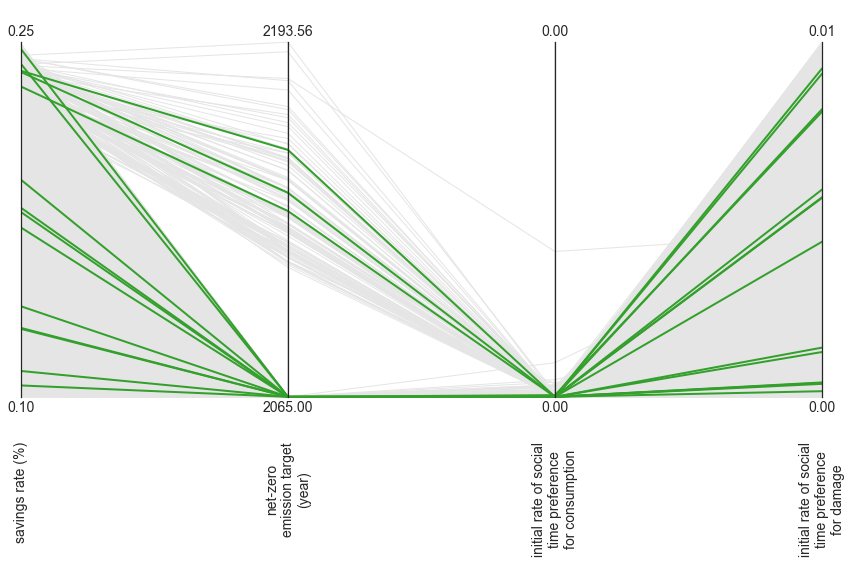

In [6]:
limits = get_limits_from_several_sources(problem_formulations_dict_all_policies)

for problem_formulation, df in problem_formulations_dict.items():
    print(problem_formulation)
    gray_df = problem_formulations_dict_all_policies[ProblemFormulation.get_pf_from_name(problem_formulation)]
    plot_single_parallel_axis_plot(
        df=df,
        gray_df=gray_df,
        limits=limits,
        problem_formulation=problem_formulation,
        saving=True,
        sub_folder='optimalpolicies',
        file_name=f'optimal_policies_{problem_formulation}'
    )

## Combine figures into one image


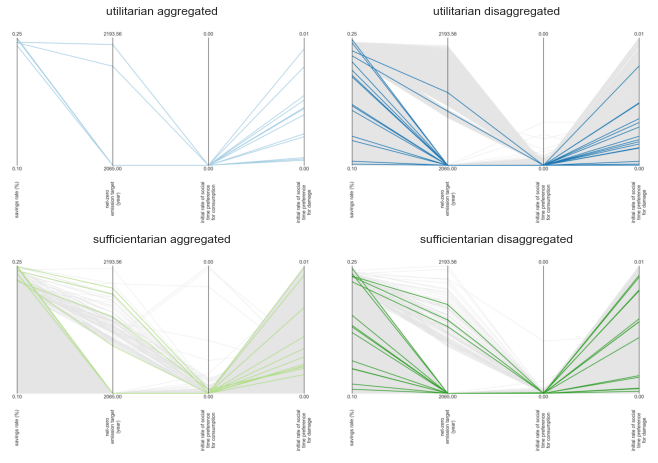

In [7]:
from matplotlib import pyplot as plt

image_folder = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    'outputimages',
    'optimalpolicies'
)

images = []
for problem_formulation in problem_formulations:
    file_name = f'optimal_policies_{problem_formulation.name}.png'
    img = plt.imread(os.path.join(image_folder, file_name))
    images.append(img)

fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0, hspace=0.1)
axes[0, 0].imshow(images[0])
axes[0, 1].imshow(images[1])
axes[1, 0].imshow(images[2])
axes[1, 1].imshow(images[3])

axes[0, 0].set_title('utilitarian aggregated')
axes[0, 1].set_title('utilitarian disaggregated')
axes[1, 0].set_title('sufficientarian aggregated')
axes[1, 1].set_title('sufficientarian disaggregated')

axes[0, 0].axis('off')
axes[0, 1].axis('off')
axes[1, 0].axis('off')
axes[1, 1].axis('off')

path = os.path.join(image_folder, 'optimal_policies.png')
fig.savefig(path, dpi=300, bbox_inches='tight')